In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

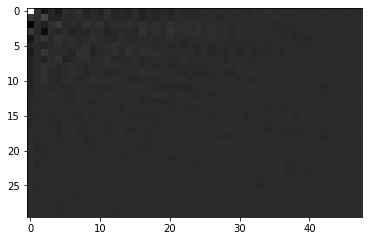

In [2]:
img = np.float32(np.array(Image.open("../app/assets/Imagens_teste/babooneye.png").convert('L')))
dct = cv2.dct(img)
plt.imshow(dct, cmap = 'gray')

In [3]:
class DCT:
    def __init__(self):
        self.input_dct2d = None
        self.output_dct2d = None
        
        self.input_idct2d = None
        self.output_idct2d = None

    def get_2d_dct(self, image, n_coef = 0):
        self.input_dct2d = image

        output = np.zeros(image.shape)

        R = output.shape[0]
        C = output.shape[1]

        for k in range(R):
            ck = np.sqrt(0.5) if k == 0 else 1
            for l in range(C):
                cl = np.sqrt(0.5) if l == 0 else 1
                for m in range(R):
                    for n in range(C):
                        output[k][l] += image[m][n] * np.cos(((2*m + 1) * k*np.pi)/(2*R)) * np.cos(((2*n + 1) * l*np.pi)/(2*C))
                output[k][l] *= ck * cl

        output *= 2.0/np.sqrt(R*C)

        if n_coef > 0:
            output.sort()
            for i in range(n_coef, n):
                output[i] = 0

        self.output_dct2d = output
        return output
        
    def get_2d_dct_sep(self, image, n_coef = 0):
        self.input_dct2d = image
        
        output = np.zeros(image.shape)
        
        for row in range(image.shape[0]):
            output[row, :] = self.get_1d_dct(image[row, :], n_coef)
        
        for column in range(image.shape[1]):
            output[:, column] = self.get_1d_dct(output[:, column], n_coef)
        
        self.output_dct2d = output
        return output
    
    def get_1d_dct(self, image, n_coef = 0):
        output = np.zeros(image.shape)
        n = len(image)

        for k in range(n):
            ck = np.sqrt(0.5) if k == 0 else 1
            for i in range(n):
                output[k] += image[i] * np.cos(2 * np.pi * k / (2.0 * n) * i + (k * np.pi) / (2.0 * n))
            output[k] *= ck

        output *= np.sqrt(2.0/n)

        if n_coef > 0:
            output.sort()
            for i in range(n_coef, n):
                output[i] = 0

        return output
    
    def get_inv_2d_dct(self, image = None):
        
        if type(image) == type(None):
            image = self.output_dct2d
            
        self.input_idct2d = image
        
        output = np.zeros(image.shape)

        for row in range(image.shape[0]):
            output[row, :] = self.get_inv_1d_dct(image[row, :])
            
        for column in range(image.shape[1]):
            output[:, column] = self.get_inv_1d_dct(output[:, column])
        
        self.output_idct2d = output
        return output
        
    def get_inv_1d_dct(self, image):
        output = np.zeros(image.shape)
        n = len(image)

        for i in range(n):
            for k in range(n):
                ck = np.sqrt(0.5) if k == 0 else 1
                output[i] += ck * image[k] * np.cos(2 * np.pi * k / (2.0 * n) * i + (k * np.pi) / (2.0 * n))
            output[i] *= np.sqrt(2.0 / n)

        return output
    
    def show_process(self):
        fig, axs = plt.subplots(1, 3, figsize = (16,16))
        axs[0].imshow(self.input_dct2d, cmap = 'gray')
        axs[1].imshow(self.output_dct2d, cmap = 'gray')
        axs[2].imshow(self.output_idct2d, cmap = 'gray')
        plt.show()

In [4]:
conv = DCT()

dct = conv.get_2d_dct(img, 0)
idct = conv.get_inv_2d_dct()

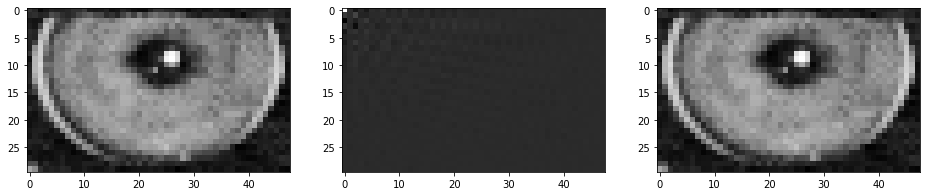

In [5]:
conv.show_process()